In [1]:
import keras
keras.__version__
import numpy as np
import os, shutil
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau

base_dir = 'fashion_data'

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

ClothesList = ['bottom_jean_dark_plain', 'bottom_jean_dark_ripped', 'bottom_jean_light_plain', 'bottom_jean_light_ripped',
             'bottom_pants_black_etc', 'bottom_pants_black_plain', 'bottom_pants_brown_etc',
             'bottom_pants_brown_plain', 'bottom_pants_green_etc', 'bottom_pants_green_plain',
             'bottom_pants_grey_etc', 'bottom_pants_grey_plain', 'bottom_pants_white_etc',
             'bottom_pants_white_plain']

## train 데이터로 join
for cl in ClothesList :
    globals()['train_{}'.format(cl)] = os.path.join(train_dir, cl)
    
## validation 데이터로 join
for cl in ClothesList :
    globals()['validation_{}'.format(cl)] = os.path.join(validation_dir, cl)
    
## test 데이터로 join
for cl in ClothesList :
    globals()['test_{}'.format(cl)] = os.path.join(test_dir, cl)

Using TensorFlow backend.


In [2]:
## 모델 생성
from keras.applications import ResNet50
from keras.layers import Dense, Input, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization

conv_base = ResNet50(weights = 'imagenet',
                    include_top = False,
                    input_shape = (224,224,3))

from keras import models
from keras import layers

model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(14, activation='softmax'))

print('conv_base를 동결하기 전 훈련되는 가중치의 수:', 
      len(model.trainable_weights))
conv_base.trainable = True
print('conv_base를 동결한 후 훈련되는 가중치의 수:', 
      len(model.trainable_weights))

c:\users\82104\anaconda3\envs\py36\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


conv_base를 동결하기 전 훈련되는 가중치의 수: 216
conv_base를 동결한 후 훈련되는 가중치의 수: 216


In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지의 크기를 150 × 150로 변경합니다
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

model.compile(loss='categorical_crossentropy',
#               optimizer=optimizers.RMSprop(lr=1e-3),
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=200,
      epochs=200,
      validation_data=validation_generator,
      validation_steps=14,
      verbose=1)

Found 830 images belonging to 14 classes.
Found 280 images belonging to 14 classes.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/200
200/200 [==============================] - 100s 502ms/step - loss: 0.8874 - acc: 0.7430 - val_loss: 1.2853 - val_acc: 0.6857
Epoch 2/200
200/200 [==============================] - 87s 435ms/step - loss: 0.3096 - acc: 0.8952 - val_loss: 1.1273 - val_acc: 0.7607
Epoch 3/200
200/200 [==============================] - 87s 436ms/step - loss: 0.2439 - acc: 0.9205 - val_loss: 1.0364 - val_acc: 0.7786
Epoch 4/200
200/200 [==============================] - 86s 432ms/step - loss: 0.2308 - acc: 0.9225 - val_loss: 1.0411 - val_acc: 0.7929
Epoch 5/200
200/200 [==============================] - 87s 434ms/step - loss: 0.1584 - acc: 0.9510 - val_loss: 1.2360 - val_acc: 0.7714
Epoch 6/200
200/200 [==============================] - 87s 433ms/step - loss: 0.1327 - acc: 0.9525 - val_loss: 1.2304 - val_acc: 0.7536
Epoc

200/200 [==============================] - 87s 437ms/step - loss: 0.0338 - acc: 0.9878 - val_loss: 2.1390 - val_acc: 0.7357
Epoch 57/200
200/200 [==============================] - 88s 438ms/step - loss: 0.0472 - acc: 0.9875 - val_loss: 2.1635 - val_acc: 0.7250
Epoch 58/200
200/200 [==============================] - 88s 438ms/step - loss: 0.0360 - acc: 0.9868 - val_loss: 1.9490 - val_acc: 0.7500
Epoch 59/200
200/200 [==============================] - 88s 438ms/step - loss: 0.0399 - acc: 0.9897 - val_loss: 2.4761 - val_acc: 0.7036
Epoch 60/200
200/200 [==============================] - 87s 437ms/step - loss: 0.0369 - acc: 0.9897 - val_loss: 1.5220 - val_acc: 0.8036
Epoch 61/200
200/200 [==============================] - 87s 437ms/step - loss: 0.0513 - acc: 0.9853 - val_loss: 5.4799 - val_acc: 0.5036
Epoch 62/200
200/200 [==============================] - 87s 437ms/step - loss: 0.0477 - acc: 0.9863 - val_loss: 1.5894 - val_acc: 0.7857
Epoch 63/200
200/200 [==============================] 

Epoch 116/200
200/200 [==============================] - 88s 438ms/step - loss: 0.0155 - acc: 0.9957 - val_loss: 1.5484 - val_acc: 0.8036
Epoch 117/200
200/200 [==============================] - 88s 438ms/step - loss: 0.0164 - acc: 0.9945 - val_loss: 1.2478 - val_acc: 0.8143
Epoch 118/200
200/200 [==============================] - 88s 439ms/step - loss: 0.0519 - acc: 0.9887 - val_loss: 1.4913 - val_acc: 0.7750
Epoch 119/200
200/200 [==============================] - 88s 438ms/step - loss: 0.0205 - acc: 0.9922 - val_loss: 1.5730 - val_acc: 0.7857
Epoch 120/200
200/200 [==============================] - 88s 438ms/step - loss: 0.0180 - acc: 0.9938 - val_loss: 1.3858 - val_acc: 0.8179
Epoch 121/200
200/200 [==============================] - 88s 438ms/step - loss: 0.0207 - acc: 0.9950 - val_loss: 0.9735 - val_acc: 0.8429
Epoch 122/200
200/200 [==============================] - 88s 439ms/step - loss: 0.0677 - acc: 0.9868 - val_loss: 1.7601 - val_acc: 0.7250
Epoch 123/200
200/200 [===========

200/200 [==============================] - 88s 438ms/step - loss: 0.0173 - acc: 0.9947 - val_loss: 1.3655 - val_acc: 0.8214
Epoch 176/200
200/200 [==============================] - 88s 438ms/step - loss: 0.0196 - acc: 0.9935 - val_loss: 1.2039 - val_acc: 0.8357
Epoch 177/200
200/200 [==============================] - 88s 439ms/step - loss: 0.0124 - acc: 0.9965 - val_loss: 1.6796 - val_acc: 0.8071
Epoch 178/200
200/200 [==============================] - 88s 438ms/step - loss: 0.0540 - acc: 0.9852 - val_loss: 1.1439 - val_acc: 0.8143
Epoch 179/200
200/200 [==============================] - 88s 438ms/step - loss: 0.0186 - acc: 0.9935 - val_loss: 1.5797 - val_acc: 0.7893
Epoch 180/200
200/200 [==============================] - 88s 438ms/step - loss: 0.0163 - acc: 0.9947 - val_loss: 1.5311 - val_acc: 0.8250
Epoch 181/200
200/200 [==============================] - 88s 438ms/step - loss: 0.0071 - acc: 0.9977 - val_loss: 1.6457 - val_acc: 0.8107
Epoch 182/200
200/200 [=========================

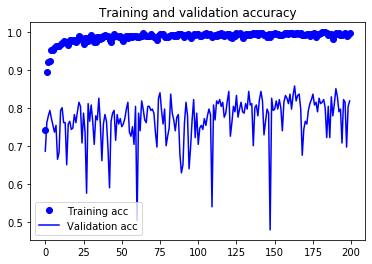

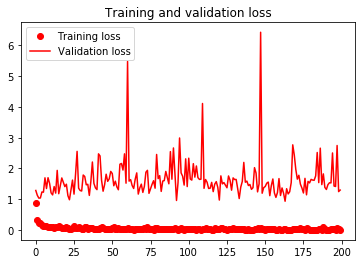

In [8]:
import matplotlib as mpl
import matplotlib.pylab as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 70 images belonging to 14 classes.
test acc: 0.8568181795152751
